#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **   _ M1- TP1 Apprentissage Automatique et Numérique_** </span>

# <span style="color:green; font-family:Georgia; font-size:1.5em;">1. Introduction

<span style="color:black; font-family:Georgia; font-size:1.3em;">Les objectifs de ce premier TP sont :</span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Exploration et Visualisation de données avec la bibliothèque __Pandas__</span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Implémentation d'une régression Linéaire Multiple avec la méthode de __moindres carrés__</span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire : </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Formule : $ y=\sum_{i=1}^N w_i x_i + b  $  </span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire Simple : </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> $ N = 1 $ donc $ y= \beta_1 x_1 + \beta_0  $ </span>



# <span style="color:green; font-family:Georgia; font-size:1.5em;">2. Jeux de données 

<span style="font-family:Georgia; font-size:1.2em;">House Pricing is dataset describing the sale of individual residential property from 2006 to 2010. It contains a large number of explanatory variables involved in assessing home values. This data set gives you the opportunity to display the skills they had learned within the class.</span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will use the _House Pricing_ dataset for a regression project with a <span style="color:red">simple linear regression </span> </span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will implement the  <span style="color:red"> Least Squares Method </span> to learn a prediction  model for the _House Pricing_ dataset</span>





# <span style="color:green; font-family:Georgia; font-size:1.5em;">3. Exploration  et Visualisation de données </span>
## <span style="color:brown; font-family:Gemesorgia; font-size:1.3em;">3.1 Objectifs </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Importation de la base de données avec pandas </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Calcul de la correlation entre les variables explicatives et la variable expliquée _SalePrice_  </span>
3. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Choisir la variable explicative (exogène) </span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <span style="color:brown; font-family:times; font-size:1.3em;">3.2 Load the training and testing data </span> 

In [2]:
houses_train = pd.read_csv('train.csv')
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_test= pd.read_csv('test.csv')
houses_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1200,20,RL,75.0,11235,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,148000
1,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,116050
2,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,197900
3,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,117000
4,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,213000


In [4]:
houses_train.get_dtype_counts()
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1199.000000,1199.000000,989.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1193.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,57.105922,70.081901,10558.848207,6.106756,5.568807,1971.357798,1984.992494,104.006706,444.801501,...,95.216013,45.986656,22.196831,3.656380,14.993328,1.910759,40.487073,6.308590,2007.812344,181442.497081
std,346.265794,42.686374,23.713505,10623.548705,1.382678,1.120485,30.059978,20.535058,183.605510,440.161545,...,124.055413,65.696803,61.529650,30.003428,54.789200,33.162113,482.523289,2.672094,1.318539,81098.986765
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.500000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.000000,50.000000,70.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,899.500000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,167.000000,712.500000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1199.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


## <span style="color:brown; font-family:times; font-size:1.3em;">3.3 Variables Correlation with SalePrice </span>
<span style="color:black; font-family:Georgia; font-size:1.3em;">In this section we will search for the two most correlated variables.</span>


In [5]:
# Todo
# calculate the correlation between salePrice and all variables
# Keep the two most correlated variables to test them with the simple linear regression


In [6]:
# since we need to calculate several times the same values we need to memoize some of it
def memoize(function):
    mem = {}
    def helper(x):
        if not x in mem:
            mem[x] = function(x)
        return mem[x]
    return helper

        
    

In [7]:
# calculate the esperance of a variable
@memoize
def esperance(name):
    return mean(houses_train[name])

def mean(tab):
    n = len(tab)
    s = 0
    for x in tab:
        s += x
    return s / n

In [8]:
# calculate the distance to the mean for a variable of the train data
@memoize
def distance(name):
    return [x - esperance(name) for x in houses_train[name]]

In [9]:
@memoize
def variance(name):
    dist = distance(name)
    return sum([x**2 for x in dist]) / len(dist)
    

In [10]:
# calculate the covariance of two variables given for each value of the two variable the distance to the mean
def covariance(name1, name2):
    return mean([x * y for x,y in zip(distance(name1),distance(name2))])

In [11]:
# calculate the correlation between two variable
def correlation(name1, name2):
    return covariance(name1, name2) / (variance(name1) * variance(name2))**.5

In [12]:
# get the name of the numeric variables
names = [
    name
    for name in houses_train.columns
    if 
        houses_train[name].dtype in ['float64', 'int64']
        and
        all((x==x for x in houses_train[name])) # I don't use the columns who contains some 'nan' value
]

In [13]:
strongestCorrelation = ('n1', 'n2', 0)
for i in range(len(names)):
    name1 = names[i]
    for name2 in names[i+1:]:
        cor = correlation(name1, name2)
        if cor > strongestCorrelation[2]:
            strongestCorrelation = (name1, name2, cor)


In [14]:
strongestCorrelation
# variance("OverallQual")

('GarageCars', 'GarageArea', 0.8854302215898641)

In [15]:
strongestCorrelation = [(0, ''), (0, '')]
for name in names:
    if name == 'SalePrice':
        continue
    cor = correlation('SalePrice', name)
    if cor > strongestCorrelation[0][0]:
        strongestCorrelation[0] = (cor, name)
        strongestCorrelation.sort()
strongestCorrelation

[(0.7403659162364661, 'GrLivArea'), (0.7894380947520542, 'OverallQual')]

## <span style="color:brown; font-family:times; font-size:1.3em;">3.4 Plot SalePrice    </span> 

In [16]:
# get the data description
description = {}
with open("data_description.txt") as f:
    for line in f:
        if ':' in line:
            name, descr = line.split(':')
            description[name] = descr

In [17]:
# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
# add x label and Y label, the values and the scatter
first = strongestCorrelation[1][1]
secnd = strongestCorrelation[0][1]
def showCorrelation(name):
    plt.plot(houses_train[name], houses_train.SalePrice, 'o')
    plt.title("Distribution of Sale Price as function of " + name)
    plt.xlabel(description[name])
    plt.ylabel("Sale Price (in dollar)");
# plt.title("Distribution of Sale Price as function of " + first)
# plt.xlabel(first)
# plt.ylabel("Sale Price (in dollar)")

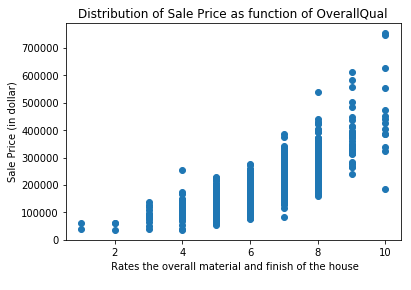

In [18]:
showCorrelation(first)

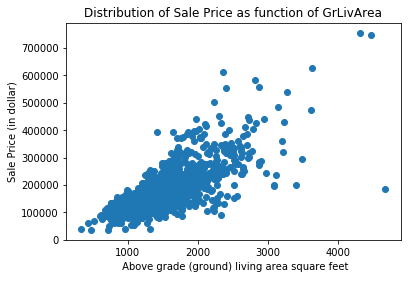

In [19]:
showCorrelation(secnd)

# <span style="color:green; font-family:Georgia; font-size:1.5em;">4. Regression Lineaire Simple (Python) </span>


In [20]:
# Todo 

# Estimation de \beta_1

#

def beta1(name):
    return covariance(name, 'SalePrice') / variance(name)


In [21]:
# Todo 
# Estimation de \beta_0
def beta0(name, b1):
    return esperance('SalePrice') - b1 * esperance(name)

In [22]:
def betas(name):
    b1 = beta1(name)
    b0 = beta0(name, b1)
    return (b0, b1)

In [31]:
# Calculez le coeffecient de détermination R2 
def coefDetermination_2(name):
    b0, b1 = betas(name)
    y_ = esperance('SalePrice')
    modeleY = [b0 + x*b1 for x in houses_train[name]]
    sce = sum([(y - y_)**2 for y in modeleY])
    sct = sum([(y - y_)**2 for y in houses_train.SalePrice])
    return sce/sct

In [32]:
b1=beta1(first)
b1

46303.34708089103

In [33]:
b0=beta0(first, b1)
b0

-101320.72837888583

In [35]:
coefDetermination_2(first)

0.6232125054457559

The coeficient of determination is not very good, it means that this model is weak at prediction. 

In [46]:
# prédire les valeurs sur les données de Test
prediction = [(b0 + x*b1, p) for x, p in zip(houses_test[first], houses_test.SalePrice)]



# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Evaluation du  modèle (RMSE)
  </span>


<span style="font-family:Georgia; font-size:1.2em;">La  racine  carrée  de l’erreur quadratique moyenne (RMSE) est une   autre  mesure  des  erreurs  de  prévision. La RMSE est définie par : $ RMSE = \sqrt{ \frac{1}{n} \sum (pred - y)^{2}} $.
</span>

<span style="font-family:Georgia; font-size:1.2em;">
Cette  mesure  pénalise  d'avantage  les  erreurs  importantes 
</span>

In [28]:
# Calculez la RMSE de votre modèle sur les données de test





# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Pour aller plus loin </span>

<span style="font-family:Georgia; font-size:1.2em;">  
La standardisation des données consiste à centrer-réduire la matrice de fonctions caractéristiques  $X$ en retranchant pour chaque vecteur $X^{j}, j \in [1, N]$ sa moyenne et en divisant par son écart-type.
</span>


<span style="font-family:Georgia; font-size:1.2em;">
La formule d’usage est alors : $ ~~~~~~~~~~~  \forall j \in [1, N] ~~~~ X^{j} = \frac{X^{j}_{std} - \mu_{j}}{ \sigma^{2}_{j}}$

</span>

In [29]:
# Todo :
##  refaire le calcul des paramètres après un prétraitement sur les données d'apprentissage
##  1.  Centrer la variable --> soustraire son espérance à chacune de ses valeurs initiales
##  2.  Réduire la variable --> diviser toutes ses valeurs par son écart type.
## --------------------------
##    Soient  μ  l’espérance et σ l’écart-type des valeurs d’une variable aléatoire.
##    Centrer-réduire l’une de ses valeurs V revient alors à calculer : 
##          (V - μ ) / σ 
## --------------------------
##  3. re-éstimer les paramètre de modèle 
##  4. re-calculer la précision du modèle sur les données de test.




In [30]:
## Vos remarques !!

# <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>